# Neural Networks

In this first part, we are going to see some useful techniques to build and train Neural Networks. We restrict here to a subclass called Multi Layer Perceptrons (MLP), which basically are a bunch of perceptrons stacked together, as we saw in class (slightly more formally each node of a layer can only be connected to nodes of the next layer). \
We use a library novel for us, **Keras**, that simplify the process of defining Neural Network architectures and train them. \
Keras documentation: [<a href="https://keras.io/">Link</a>]. \



## Step 0: import required packages

In [1]:
import numpy as np

## Step 1: load data

In [2]:
from sklearn import datasets

ID = 2071962

np.random.seed(ID) # My Matricola as random seed
X, y = datasets.make_classification(n_samples=2000, n_features=2, random_state=123, n_redundant= 0, scale=10, shift=10)
X[:, 0] = X[:, 0]*0.1

## Step 2: visualize data

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

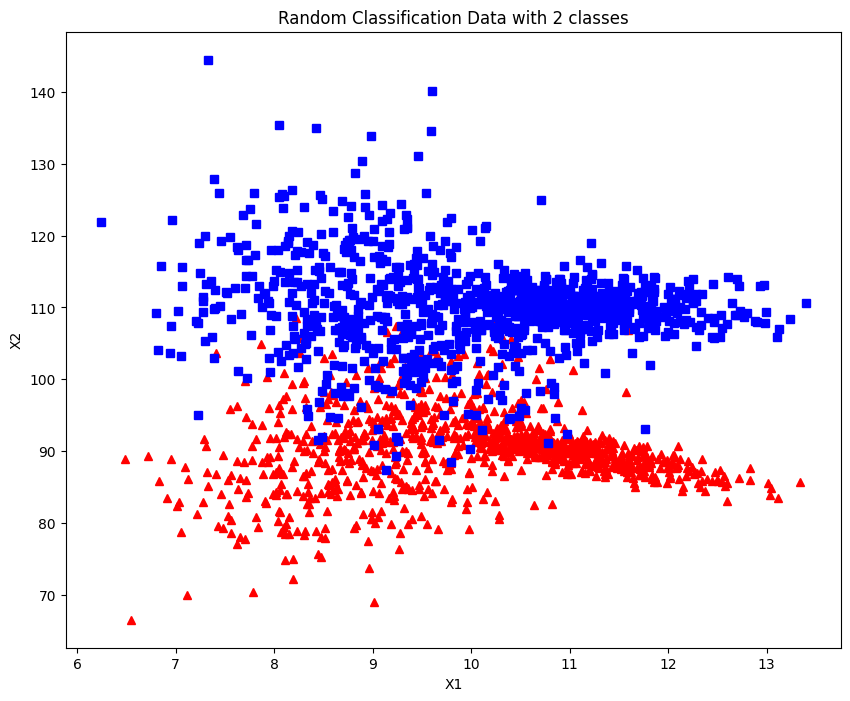

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

## Step 3: split data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)

## Step 4: data preprocessing


Let's start by scaling the data.

In [6]:
# step 4.1 for X, do feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_tr = scaler.fit_transform(X_train, y_train)

X_test_Tr = scaler.fit_transform(X_test, y_test)

Text(0.5, 1.0, 'X_train after preprocessing')

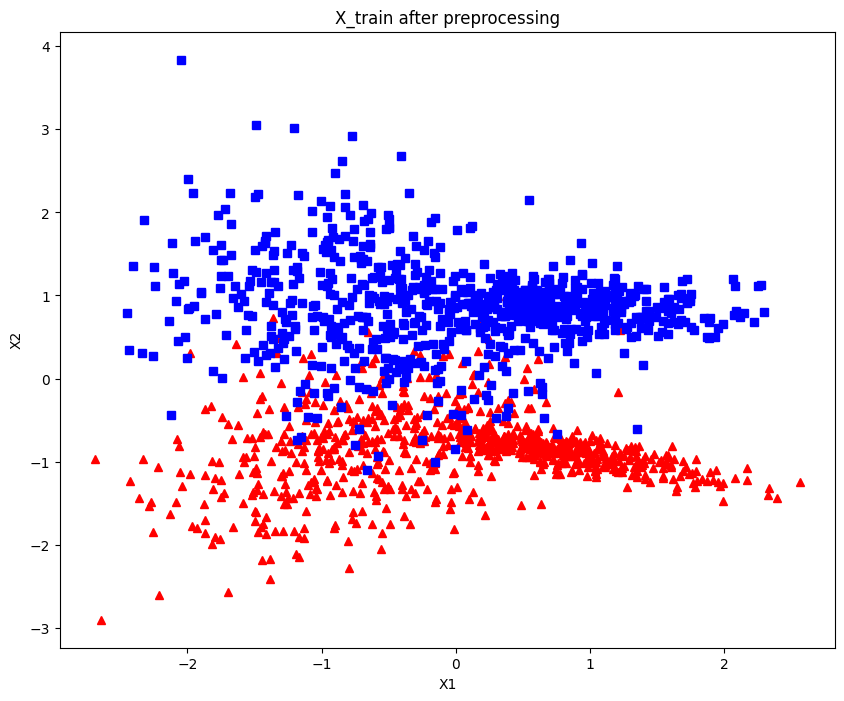

In [7]:
#Plot again to see the effect of StandardScaler on Data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
plt.plot(X_train_tr[:, 0][y_train == 0], X_train_tr[:, 1][y_train == 0], 'r^')
plt.plot(X_train_tr[:, 0][y_train == 1], X_train_tr[:, 1][y_train == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('X_train after preprocessing')

Classification tasks require some preprocessing of the ground truth.
In particular, we aim to define a MLP where the output layer is equal to the number of classes of the task.

Thus, we need to convert the ground-truth to the so called hot encoding. For example, suppose that we have  y=[cat,dog,cat,cat] , we assign the vector  cat=[1,0] , and  dog=[0,1] .

With this conversion strategy, we obtain the following:  y=[[1,0],[0,1],[1,0],[1,0]] .

In [9]:
# step 4.2 for Y, perform to categorical
from keras.utils import to_categorical

num_classes=2

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
print(y_train[:5])
print(y_train_cat[:5])

ModuleNotFoundError: No module named 'tensorflow'

## Step 5: import packages for model definition

A Sequential model is used when you have a **plain stack of layers** on top of each other and each layer has one input/output.
for this implementation we use [Sequential API](https://keras.io/guides/sequential_model/#:~:text=from%20the%20start%3A-,model%20%3D%20keras.Sequential(),-model.add) and we add whatever layers we require to that.

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.framework.random_seed import set_random_seed

## Step 6: define the architecture of the network

In [11]:
np.random.seed(ID)
set_random_seed(2)

feature_vector_length = X_train.shape[1]

model = Sequential([
    Dense(input_dim = feature_vector_length, units=128, activation='relu'), #input layer
    Dense(num_classes, activation='softmax') #output layer
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Note**

model.compile specifies the loss function, the optimizer and the metrics.  model.compile does not modify weights. in other words, by compiling a model as many times as you want does not have any effect on pretrained weights.

### **Model Summary**

Keras provides a way to check the model information which is called model summary.

The summary concludes of the following information:

* The layers and their order in the model.
* The output shape of each layer.
* The number of parameters (weights) in each layer.
* The total number of parameters (weights) in the model.









In [12]:
# see model summary

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
None


plot_model Converts a Keras model to dot format which provides a graph representation of model and save to a file.

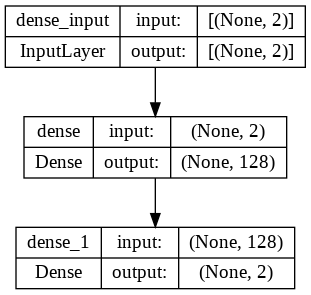

In [13]:
# see graph representation of model summary 

from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes= True)

## Step 7: train the model

During our training, we use several *epochs*, meaning that our model see more times the same training samples. 


In [14]:
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=100, verbose=0)

In [16]:
history.history

{'loss': [1.6541262865066528,
  0.5989344716072083,
  0.569892406463623,
  0.5599992871284485,
  0.5597021579742432,
  0.5311857461929321,
  0.5142219066619873,
  0.5165669322013855,
  0.5095081925392151,
  0.5089519619941711,
  0.5345861911773682,
  0.5076258182525635,
  0.48556724190711975,
  0.4736034870147705,
  0.47716274857521057,
  0.48918014764785767,
  0.48407143354415894,
  0.45431122183799744,
  0.47331833839416504,
  0.45351994037628174,
  0.449794739484787,
  0.4596988260746002,
  0.4579983651638031,
  0.45372486114501953,
  0.4441024363040924,
  0.43228623270988464,
  0.43529051542282104,
  0.468117356300354,
  0.42339029908180237,
  0.42251360416412354,
  0.4418124258518219,
  0.42245957255363464,
  0.40838122367858887,
  0.42980289459228516,
  0.46499690413475037,
  0.4360925257205963,
  0.40578708052635193,
  0.41013115644454956,
  0.4068484604358673,
  0.4038494825363159,
  0.3897568881511688,
  0.38893741369247437,
  0.3957645893096924,
  0.3931402266025543,
  0.3795

history records training metrics for each epoch. it consists of the loss and the accuracy when the model is doing classification and also the loss and accuracy for the validation dataset if it is given to fit.

The history object is returned from calling of the fit() function which is used to train our model. 

Metrics are stored in a dictionary in the history member of the object returned.

For example, you can list the metrics that are stored in a dictionary using the following code:

print(history.history.keys())

we use history for plotting the loss/accuracy of our model.

## Step 8: evaluate the model

In [17]:
scores = model.evaluate(X_test, y_test_cat, verbose=0)

print("Model loss: %.2f%%" % (scores[0]*100))
print("Model Accuracy: %.2f%%" % (scores[1]*100))


Model loss: 28.32%
Model Accuracy: 89.00%


## Step 9: visualize error and loss for training and visualize validation loss/accuracy

In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


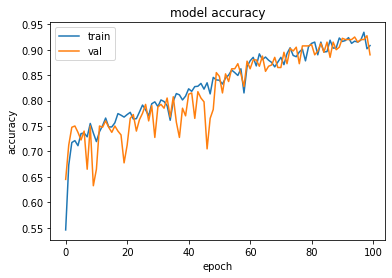

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

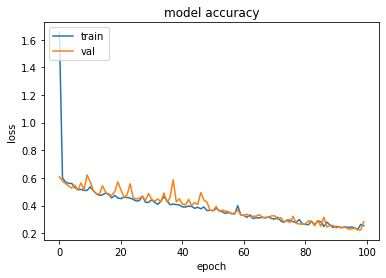

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

______________________________________________________________________________

# Exercise 1

In this first exercise, we are going to guide you through several experiments on a dataset almost identical to the previous one. 


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

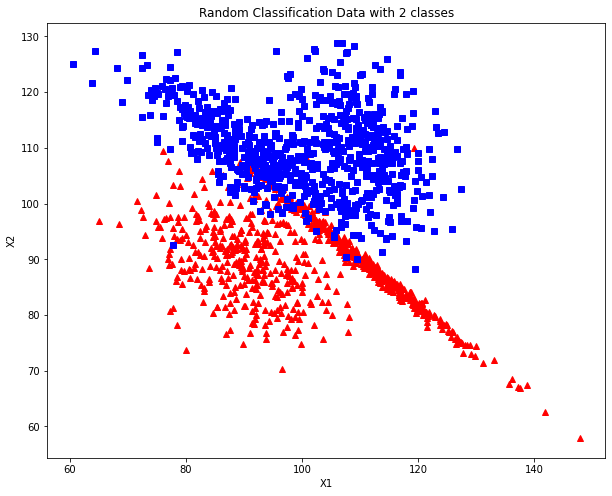

In [ ]:
from sklearn import datasets
import numpy as np
np.random.seed(123)
X, y = datasets.make_classification(n_samples=1500, n_features=2, random_state=123, n_redundant= 0, scale=10, shift=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)


#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

## Ex1.1

Create a MLP called $model_1$ with two layers:

1.   one input layer with two neurons and relu as activation function. 
2.   one output layer.

Then, train it for 5 epochs, batch size = 16, and a validation set of 25%. 


In [ ]:
## EX1.1 HERE
set_random_seed(2)

# in order to get 25% to the validation you can use the following
history = model.fit(X_train, y_train_cat,validation_split= .25, epochs=5, verbose=0)

## Ex 1.2

Plot both accuracy and loss curves 

Answer the following:

1.   Is there any underfitting / overfitting problem?
2.   How is then training curve shape? 



In [ ]:
### Ex1.2 HERE

The loss curve tells us that the training improves only up to two epochs, but then something *odd* happens: the validation loss is almost always costant, while the validation accuracy is unstable. 

There is something going on with the model, and in the next point we aim to address it. 

## Ex1.3

We move temporarily into an important aspect: *knowing our data*.
As we introduced in our last lesson, the goal of a good data scientist is not only to provide a good training model, but he / she needs to learn the data we are experimenting with. </br>
When working with a dataset, try to answer to the following:


1.   Is the ground truth balanced among the classes? In case of an unbalanced dataset, we need to be more careful on how we compute the performance. 
2.   What are the properties of the input features? For each feature, you can understand the following: i) is it defined in the discrete or continuous domain? if defined in the continous domain, How is it distributed? For example, print the minimum and maximum values for each feature.

Based on the answers, we can "improve" our training strategy. 




In [ ]:
#balance / unbalance
from collections import Counter

Counter(y)


Counter({0: 749, 1: 751})

The ground truth is completely balanced. Let's see how the features looks like. 

In [ ]:
### Ex1.3 HERE
#we get the min / max of each feature


Ok. This might be an issue for our training model. \
Neural Networks are trained with optimizers based on the gradient. 
This implies that the optimization might not be efficient when the features are not defined in small ranges (i.e., [-1, 1]). 


## Ex 1.4

We can try to now improve our model by scaling the features. Use a standard scaler to scale $X_{train}$ and $X_{test}$, create a new MLP $model_2$ and train it with the same configurations (architecure, training strategy) as done  for $model_1$. 

Then we'll do some plots to check the accuracy and loss of the latest model and finally compare it with the previous one (see below for details)


In [ ]:
### Ex1.4 HERE

Our second model gained an improvement in the validation accuracy (+5%), which is not bad at all given that we just did a simple preprocessing. \
But let us plot the accuracy on train and validation of our latest model with respect to the number of epochs. 

Let's now plot the loss of our latest model on the train and validation sets. 

Let's now compare the performance of the two models on the validation set. 

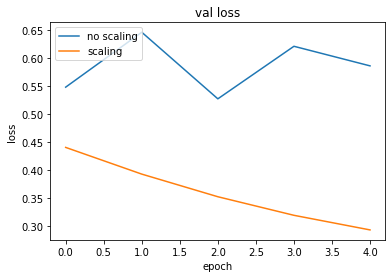

In [ ]:
#----------SOLUTION
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['no scaling', 'scaling'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

The accuracy scores improve "regularly" using the scaled dataset. \
As we noticed in the original training, the model can still learn by increasing the number of epochs. \

## Ex1.5

Let's do it. \
For example, we can train a new MLP $model_3$ for 50 epochs. 
Print loss and accuracy curves, and then visually analyze them. \
Again, use the same configuration as $model_1$.


In [ ]:
# EX 1.5

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

The charts show some common training trends. For example, let's consider the loss:


1.   In the early stages (epoch 1 - 5), there is a phase where the model performance improve quickly. 
2.   From epoch 6 to 15, there is a stabilization trend, where the model improves at a lower rate, and it might seem that the training is almost done. Then there is a new phase of improvement. 
3.   After epoch 30, the loss does not improve much, and the loss decreases very slowly.

## Ex1.6

If our model stops improving during training, we are still stuck with training it for the number of epochs we set. However, we can save our time by introducing an **early stopping mechanism** <a href = "https://keras.io/api/callbacks/early_stopping/"> [link] </a>. 
For example, during the training, if the model validation loss does not improve 
for 3 epochs, we decide to stop. 
In this way, we can even set the number of epochs to 10000. 

Define a fourth MLP $model_4$ with the early stopping mechanism with patience = 3 (number of epochs with no improvement after which we stop the trainin process). Use the same configuration of $model_1$.
Train the model for 500 epochs, and then plot the accuracy and loss curves.



In [ ]:
from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)

#seed
np.random.seed(123)
set_random_seed(2)

# Create the model
model4 = Sequential() #we first define how the "model" looks like
model4.add(Dense(input_dim = feature_vector_length, units=2 , activation='relu')) #input layer
model4.add(Dense(num_classes, activation='softmax')) #output layer

#see how the model looks like
print(model4.summary())

# Configure the model and start training
model4.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history4 = model4.fit(X_train_scl, y_train_cat, epochs=500, batch_size=16, verbose=0, validation_split=0.25, callbacks=[es])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None
Epoch 137: early stopping


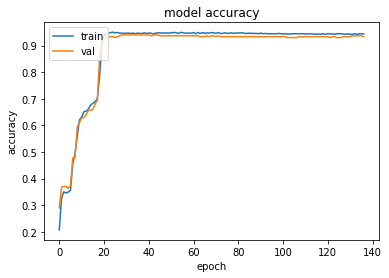

In [ ]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

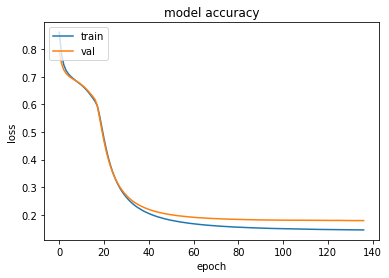

In [ ]:
# summarize history for accuracy
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

We see that the model stopped at epoch 137. </br>

We created so far $4$ models, with four different training strategy, but the same architecture. \

We can now see what it would happen on the "real" life, i.e., if the fourth model is actually the best on the testing set as well. 
Remember: the fourth seems the best based on the validation accuracy and loss.

In [ ]:
### Ex1.6

## Ex1.7 

So far, when we defined a new model, we always "repeated" a set of instructions, like model definition (i.e., Sequential, add Dense layers, compile). \

It's time to speed-up this process. 
Create a function that, given the number of layers, creates a NN. 
Here, we set the number of neurons to 2 for all hidden layers, and activaiton function as relu. The output layer's number of neurons depend on the number of classes we use, while the activation function is a softmax. 

In [ ]:
### Ex1.7

def MLP_definer(n_layers, input_size, n_classes, activation_f):
  

## Ex 1.8 

Let's now consider the number of layers (not counting the input and output ones) of the network as a hyperparameter. 

Using the function you just defined in the previous exercise, implement a grid-search among different number of layers (from 0 to 4). \
Remember to use the earlystopping mechanism. \
Print both training and validation accuracies.
Any comment?

In [ ]:
# Exercise 1.8

# Ex 2

In this new exercise, it's time to be more independent from us. \
Try and get good performances on the *wine_dataset*.

Adopt the tips we saw in this lecture. \

Remember: use the testing set only *at the end*, when you selected the best model. 


In [ ]:
from sklearn.datasets import load_wine #load our target dataset

#load the dataset
dataset = load_wine()

#extract X and y
X = dataset.data
y = dataset.target

#split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123) 